In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from datetime import datetime as dt

In [2]:
df1 = pd.read_csv('log_mini.csv')
df2 = pd.read_csv('tf_mini.csv')

In [3]:
df1.shape, df2.shape

((167880, 21), (50704, 30))

In [4]:
df1 = df1.rename(columns={'track_id_clean':'track_id'})

In [5]:
merged_df = pd.merge(df1, df2, on='track_id')

In [6]:
merged_df.head(2)

,session_id,session_position,session_length,track_id,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,...,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826
1,0_00079a23-1600-486a-91bd-5208be0c745a,7,12,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,True,False,0,0,...,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826


In [7]:
merged_df["skipped"] = merged_df["skip_1"]*merged_df["skip_2"]*merged_df["skip_3"]
merged_df.drop(["skip_1", "skip_2", "skip_3", "not_skipped"], axis=1, inplace=True)

In [8]:
merged_df.head(2)

,session_id,session_position,session_length,track_id,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,...,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,skipped
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0,0,0,0,0,0,...,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,False
1,0_00079a23-1600-486a-91bd-5208be0c745a,7,12,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0,0,1,1,0,0,...,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,False


In [9]:
merged_df.dtypes.unique()

array([dtype('O'), dtype('int64'), dtype('bool'), dtype('float64')],
      dtype=object)

In [10]:
lst = []
bin_cols = []
for i in merged_df.columns:
    if len(merged_df[i].unique()) == 2:
        bin_cols.append(i)        
    elif len(merged_df[i].unique()) <= 80:
        print('{} has total unique values:{} \nThey are {}'.format(i, len(merged_df[i].unique()), merged_df[i].unique()))
        lst.append(i)
        print()

session_position has total unique values:20 
They are [ 1  7  6  9  8  2 13  5 16 14  4 19  3 10 17 12 15 20 18 11]

session_length has total unique values:11 
They are [20 12 13 19 11 15 16 10 17 18 14]

hist_user_behavior_n_seekfwd has total unique values:25 
They are [ 0  1  3  4  6  2  5 10 14  7 16 25  8 29  9 38 20 24 23 12 15 19 60 11
 22]

hist_user_behavior_n_seekback has total unique values:30 
They are [  0   1   2  10  21   6   4   5   3   8   7  20  13  14  15  34  52   9
  73  55 151  11  23  12  53  17  16  26  43  18]

hour_of_day has total unique values:24 
They are [16 17 21 18 19 11 15  3 23  9  0 14 22 20 13 10  5 12  7  2  1  6  4  8]

date has total unique values:18 
They are ['2018-07-15' '2018-07-14' '2018-07-10' '2018-07-11' '2018-07-05'
 '2018-07-13' '2018-06-30' '2018-07-07' '2018-07-04' '2018-07-06'
 '2018-07-12' '2018-07-16' '2018-07-09' '2018-06-29' '2018-05-12'
 '2018-06-05' '2018-05-18' '2018-06-19']

context_type has total unique values:6 
They are ['ed

In [11]:
lst

['session_position',
 'session_length',
 'hist_user_behavior_n_seekfwd',
 'hist_user_behavior_n_seekback',
 'hour_of_day',
 'date',
 'context_type',
 'hist_user_behavior_reason_start',
 'hist_user_behavior_reason_end',
 'release_year',
 'key',
 'time_signature']

In [12]:
bin_cols

['context_switch',
 'no_pause_before_play',
 'short_pause_before_play',
 'long_pause_before_play',
 'hist_user_behavior_is_shuffle',
 'premium',
 'mode',
 'skipped']

In [13]:
merged_df.isnull().sum()

session_id                         0
session_position                   0
session_length                     0
track_id                           0
context_switch                     0
no_pause_before_play               0
short_pause_before_play            0
long_pause_before_play             0
hist_user_behavior_n_seekfwd       0
hist_user_behavior_n_seekback      0
hist_user_behavior_is_shuffle      0
hour_of_day                        0
date                               0
premium                            0
context_type                       0
hist_user_behavior_reason_start    0
hist_user_behavior_reason_end      0
duration                           0
release_year                       0
us_popularity_estimate             0
acousticness                       0
beat_strength                      0
bounciness                         0
danceability                       0
dyn_range_mean                     0
energy                             0
flatness                           0
i

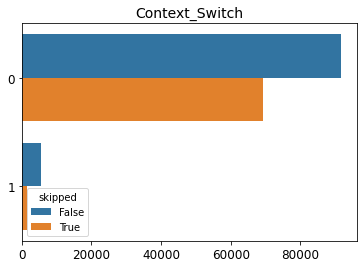

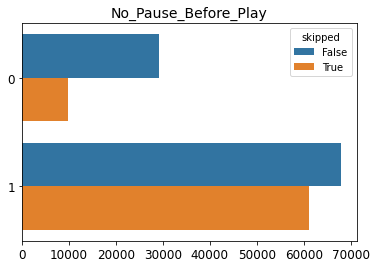

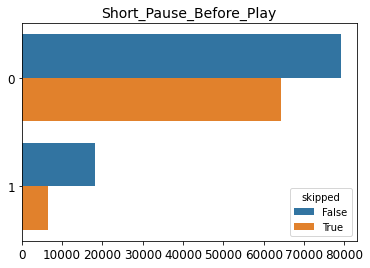

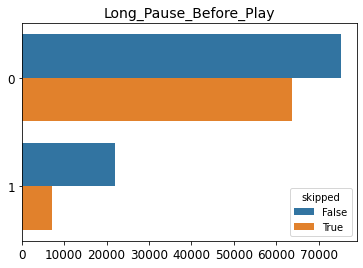

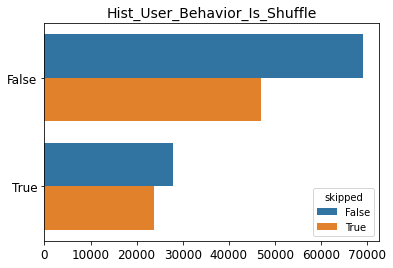

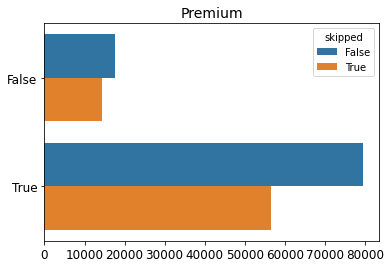

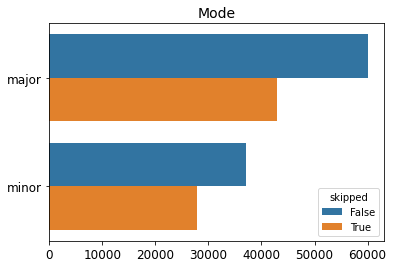

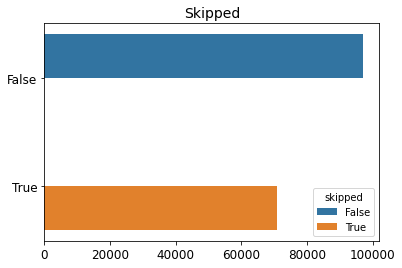

In [14]:
for i in bin_cols:
    sns.countplot(y=i,data=merged_df, hue='skipped')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(i.title(), fontsize=14)
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

## Observations
1. The count of context switch is very less which means people generelly do not change contexts while listening

2. The songs which don't have pause before play are generally skipped as compared to the songs which have pause

3. maximum songs have short and long pause before play

4. Historical behaviour data indicates that the users do not use shuffle mode much.

5. Maximum users use premium version

6. Maximum songs are from major mode


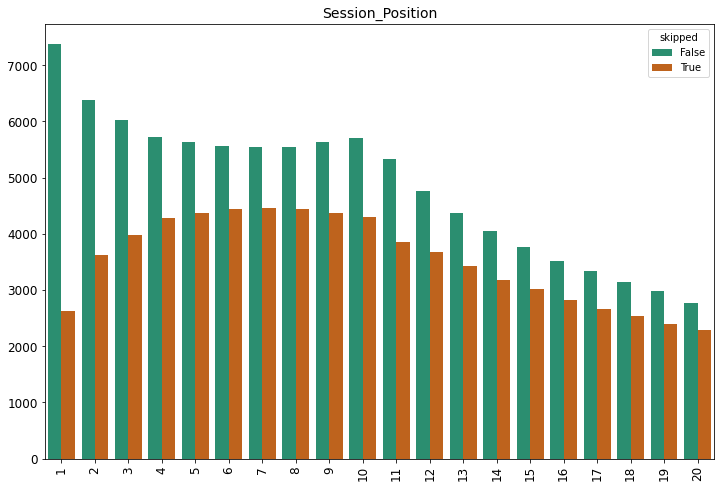

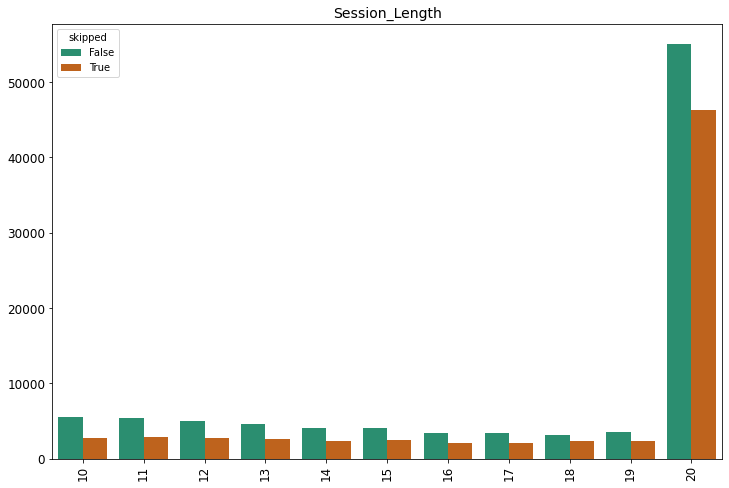

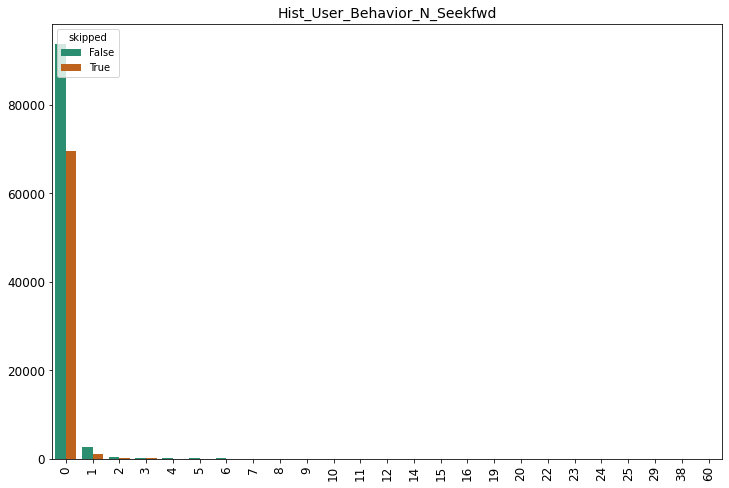

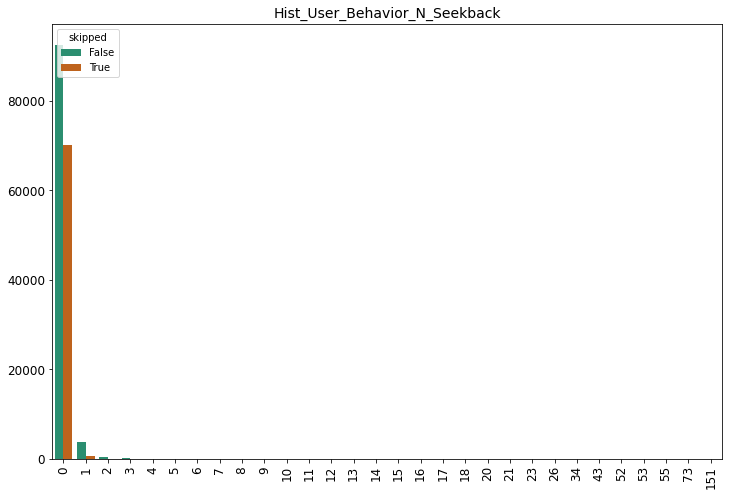

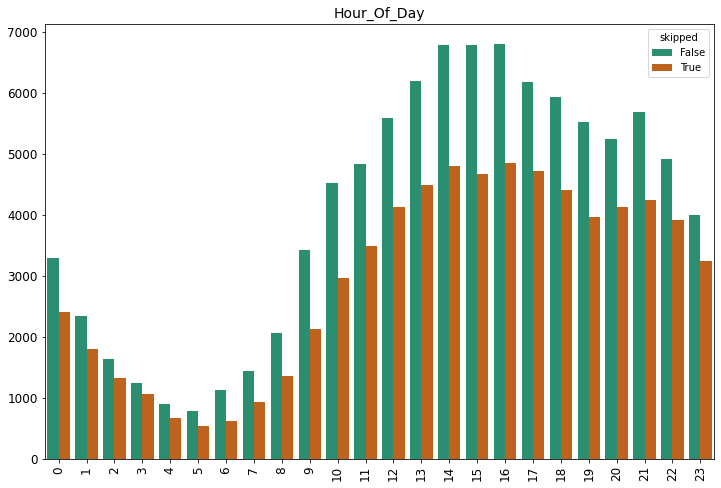

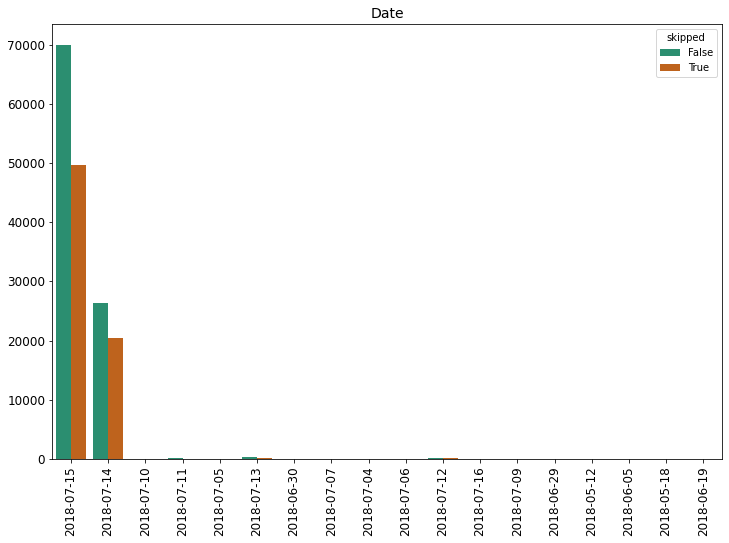

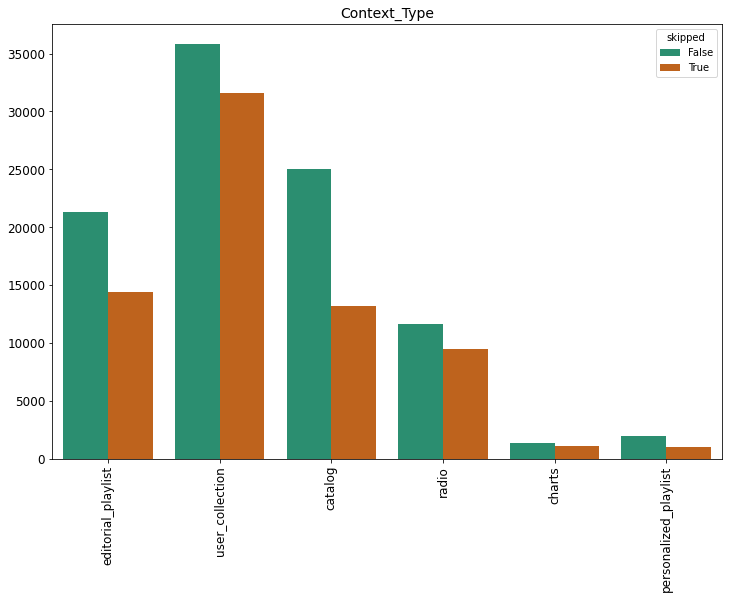

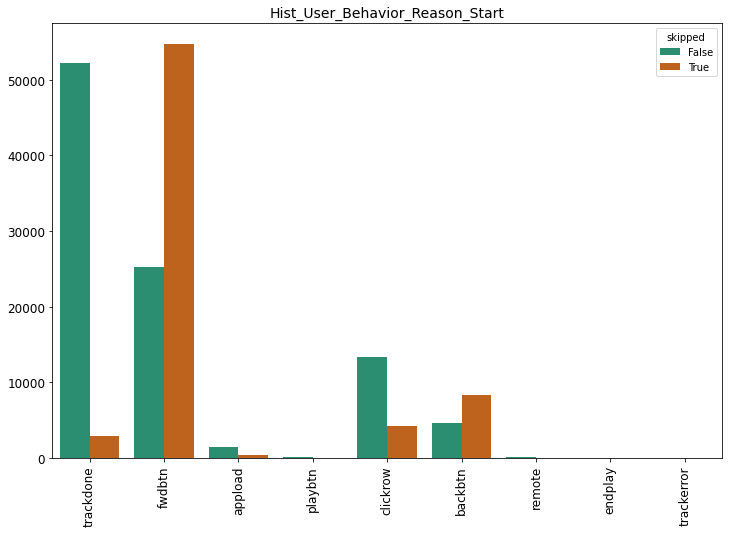

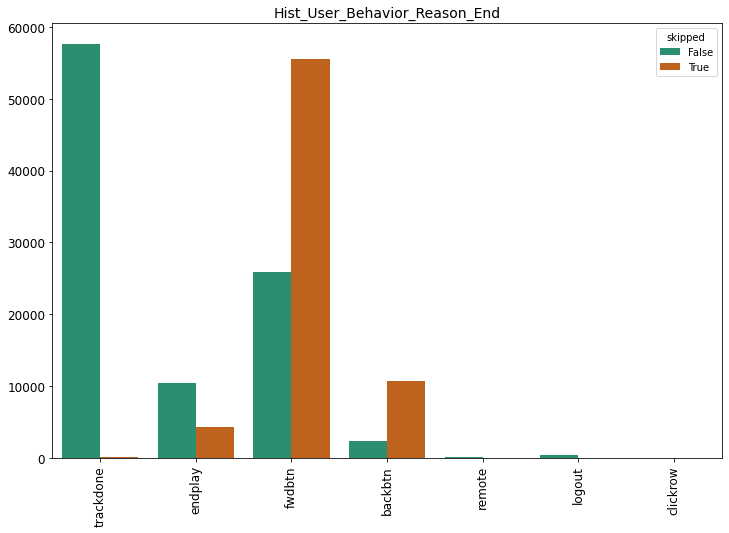

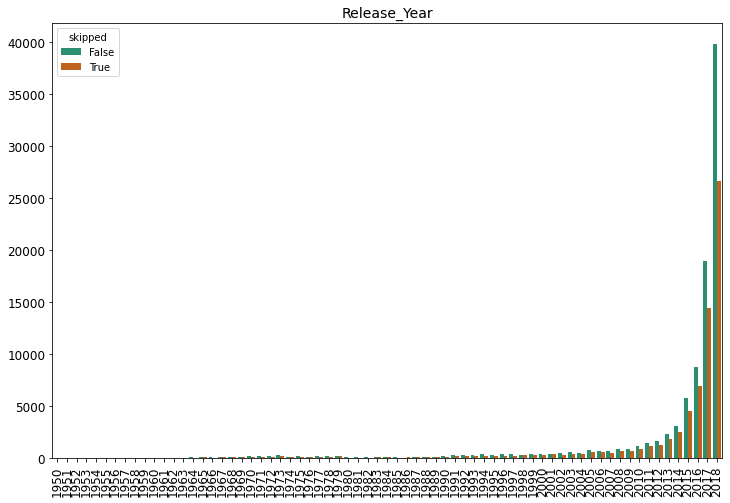

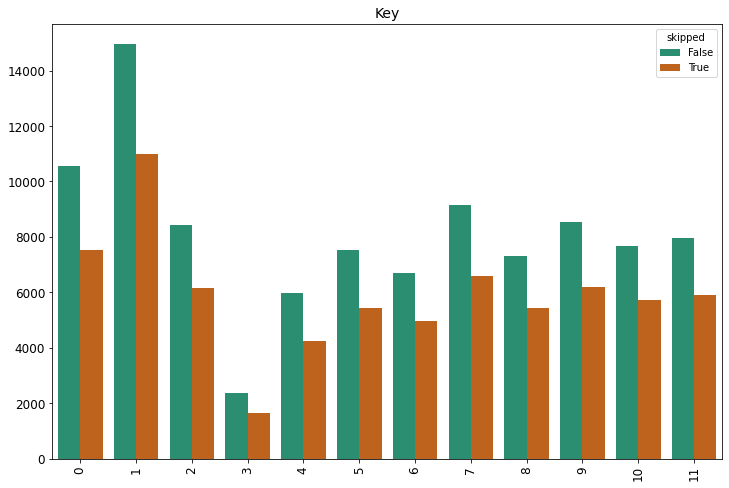

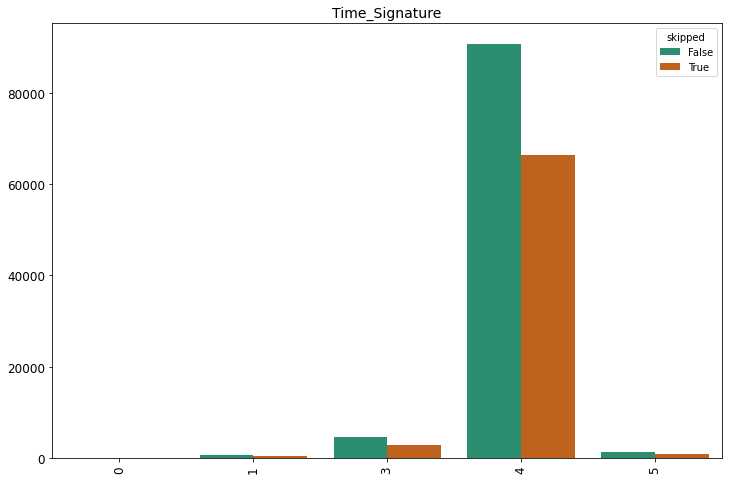

In [24]:
for i in lst:
    plt.figure(figsize=(12,8))
    sns.countplot(x=i, data=merged_df, hue='skipped', palette='Dark2')
    plt.xticks(rotation=90)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(i.title(), fontsize=14)
    plt.xlabel('')
    plt.ylabel('')
    plt.show()
    

## Observations
1. Maximum songs are present in the first three sessions and minimum in last three sessions. And the songs belonging to 1st session are skipped least as compared to others.


2. Maximum skips happened for those songs which are present in the sessions starting from session 4 upto session 10 then no of skips decreased along with the no of songs.


3. Maximum count of sessions length is 20 which means users generally listen to music for 20 mins


4. The users do not seek forward or backward through the song


5. The users do not listen to music much at late nights or early in the morning. The peak listening hours are 1pm to 5pm in the afternoon


6. Maximum songs were listened in 15-07-2018


7. The maximum number of songs fall under the context user_collection. But songs present in editorial_playlist and catalog are less skipped as compared to user_collection.


8. The 'trackdone' category has maximum no of songs that are not skipped after playing and 'fwdbtn' category has most songs skipped. It indicates that the users skipped the song when they try to play the songs by forward option but they didn't skip when the songs are played in general order.


9.  Maximum songs are released in 2018


10. Maximum songs fall under the category key-1 and minimum under the category key-3


11. The most common time signature in music is 4/4



In [26]:
merged_df.head(2)

,session_id,session_position,session_length,track_id,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,...,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,skipped
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0,0,0,0,0,0,...,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,False
1,0_00079a23-1600-486a-91bd-5208be0c745a,7,12,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0,0,1,1,0,0,...,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,False


### Seperating categorical and numerical dataset

In [27]:
cat_var = merged_df.select_dtypes(include=['O',bool])
num_var = merged_df.select_dtypes(include=['int64','float64'])

In [29]:
cat_var.head(2)

,session_id,track_id,hist_user_behavior_is_shuffle,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,mode,skipped
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,True,2018-07-15,True,editorial_playlist,trackdone,trackdone,major,False
1,0_00079a23-1600-486a-91bd-5208be0c745a,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,2018-07-15,True,editorial_playlist,fwdbtn,endplay,major,False


In [30]:
cat_var_copy = cat_var.copy()

In [31]:
cat_var = cat_var.drop('date',axis=1)

## Label Encoding

In [33]:
encoder = LabelEncoder()

In [34]:
for i in cat_var.columns:
    cat_var[i] = encoder.fit_transform(cat_var[i])

In [35]:
cat_var.head()

,session_id,track_id,hist_user_behavior_is_shuffle,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,mode,skipped
0,0,890,1,1,2,7,6,0,0
1,24,890,0,1,2,4,2,0,0
2,836,890,0,1,5,7,6,0,0
3,896,890,0,1,2,4,6,0,0
4,1142,890,1,0,2,7,3,0,0


In [36]:
new_df = pd.concat([cat_var,num_var],axis=1)

In [39]:
new_df.head()

,session_id,track_id,hist_user_behavior_is_shuffle,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,mode,skipped,session_position,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,0,890,1,1,2,7,6,0,0,1,...,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826
1,24,890,0,1,2,4,2,0,0,7,...,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826
2,836,890,0,1,5,7,6,0,0,6,...,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826
3,896,890,0,1,2,4,6,0,0,9,...,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826
4,1142,890,1,0,2,7,3,0,0,7,...,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826


In [40]:
new_df.isnull().sum()

session_id                         0
track_id                           0
hist_user_behavior_is_shuffle      0
premium                            0
context_type                       0
hist_user_behavior_reason_start    0
hist_user_behavior_reason_end      0
mode                               0
skipped                            0
session_position                   0
session_length                     0
context_switch                     0
no_pause_before_play               0
short_pause_before_play            0
long_pause_before_play             0
hist_user_behavior_n_seekfwd       0
hist_user_behavior_n_seekback      0
hour_of_day                        0
duration                           0
release_year                       0
us_popularity_estimate             0
acousticness                       0
beat_strength                      0
bounciness                         0
danceability                       0
dyn_range_mean                     0
energy                             0
f

In [42]:
lst1 = []
lst2 = []

for i in new_df.columns:
    if len(new_df[i].unique()) <= 80:
        print('{} has total unique values:{}'.format(i, len(new_df[i].unique())))
        lst1.append(i)
    else:
        #print('{} has total unique values:{}'.format(i,len(new_df[i].unique())))
        lst2.append(i)

hist_user_behavior_is_shuffle has total unique values:2
premium has total unique values:2
context_type has total unique values:6
hist_user_behavior_reason_start has total unique values:9
hist_user_behavior_reason_end has total unique values:7
mode has total unique values:2
skipped has total unique values:2
session_position has total unique values:20
session_length has total unique values:11
context_switch has total unique values:2
no_pause_before_play has total unique values:2
short_pause_before_play has total unique values:2
long_pause_before_play has total unique values:2
hist_user_behavior_n_seekfwd has total unique values:25
hist_user_behavior_n_seekback has total unique values:30
hour_of_day has total unique values:24
release_year has total unique values:69
key has total unique values:12
time_signature has total unique values:5


In [41]:
new_df.describe()

,session_id,track_id,hist_user_behavior_is_shuffle,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,mode,skipped,session_position,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
count,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,...,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000
mean,4998.533381,25683.124780,0.308732,0.810418,3.003771,4.500965,3.714641,0.386091,0.421503,9.325911,...,3.948916,0.459283,-0.516251,0.268847,0.206278,-0.016393,-0.139975,0.047940,-0.283057,0.059859
std,2885.438153,14443.284654,0.461972,0.391971,2.013510,2.003945,1.839751,0.486853,0.493801,5.457638,...,0.336965,0.229190,0.385527,0.193834,0.165442,0.266361,0.313722,0.116279,0.301132,0.261958
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,-1.122792,-1.084360,-0.752231,-0.809136,-1.029858,-0.942461,-0.736395,-0.975647
25%,2500.000000,13267.000000,0.000000,1.000000,2.000000,4.000000,3.000000,0.000000,0.000000,5.000000,...,4.000000,0.280089,-0.841586,0.225853,0.174902,-0.170540,-0.330586,-0.030063,-0.489797,-0.020752
50%,4992.000000,25773.000000,0.000000,1.000000,4.000000,4.000000,3.000000,0.000000,0.000000,9.000000,...,4.000000,0.442400,-0.658701,0.311700,0.235429,0.044054,-0.273355,0.037739,-0.376095,0.143839
75%,7501.000000,37502.000000,1.000000,1.000000,5.000000,7.000000,6.000000,1.000000,1.000000,14.000000,...,4.000000,0.626337,-0.203098,0.374788,0.298177,0.134389,-0.019001,0.139464,-0.180665,0.194377
max,9999.000000,50703.000000,1.000000,1.000000,5.000000,8.000000,6.000000,1.000000,1.000000,20.000000,...,5.000000,0.999990,0.932165,0.812837,0.605288,1.074504,0.895769,0.380279,0.966760,1.152213


### Outlier Detection

******************** session_id ********************


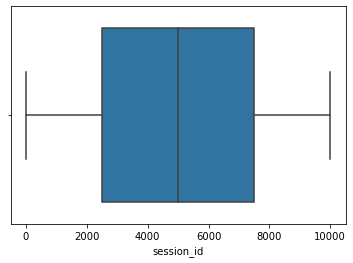

lower limit for outliers: -5001.5
upper limit for outliers: 15002.5
total number of outliers in session_id is 0

******************** track_id ********************


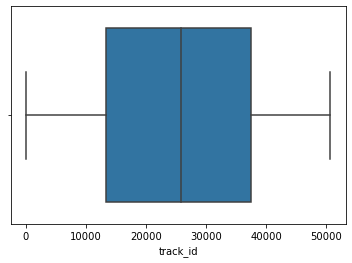

lower limit for outliers: -23085.5
upper limit for outliers: 73854.5
total number of outliers in track_id is 0

******************** duration ********************


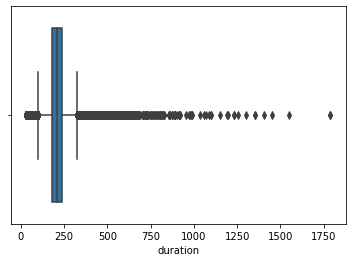

lower limit for outliers: 97.55850219726555
upper limit for outliers: 326.7449035644532
total number of outliers in duration is 8520

******************** us_popularity_estimate ********************


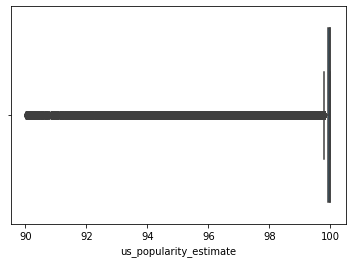

lower limit for outliers: 99.78650626090302
upper limit for outliers: 100.12604010022926
total number of outliers in us_popularity_estimate is 27537

******************** acousticness ********************


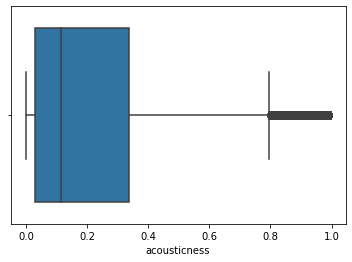

lower limit for outliers: -0.42890213709324615
upper limit for outliers: 0.7963804649189116
total number of outliers in acousticness is 7463

******************** beat_strength ********************


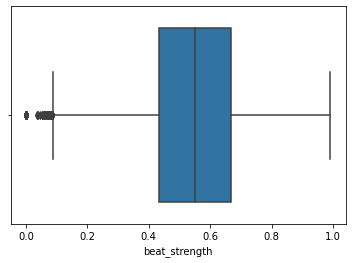

lower limit for outliers: 0.0861710496246812
upper limit for outliers: 1.0138866789638998
total number of outliers in beat_strength is 120

******************** bounciness ********************


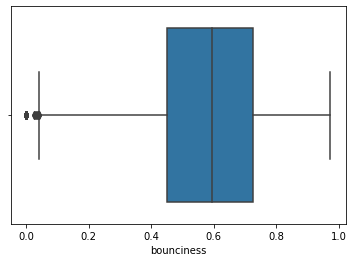

lower limit for outliers: 0.04303647577762604
upper limit for outliers: 1.1332653909921646
total number of outliers in bounciness is 45

******************** danceability ********************


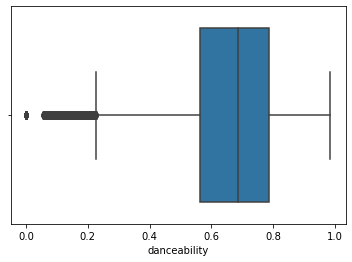

lower limit for outliers: 0.22597152739763232
upper limit for outliers: 1.1229798868298533
total number of outliers in danceability is 1311

******************** dyn_range_mean ********************


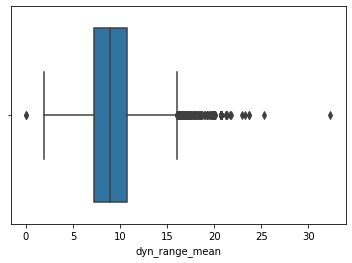

lower limit for outliers: 1.91421568393707
upper limit for outliers: 16.075128197669983
total number of outliers in dyn_range_mean is 743

******************** energy ********************


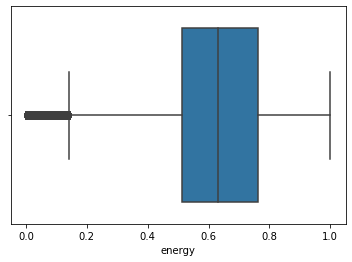

lower limit for outliers: 0.1430390626192093
upper limit for outliers: 1.1314980536699295
total number of outliers in energy is 1660

******************** flatness ********************


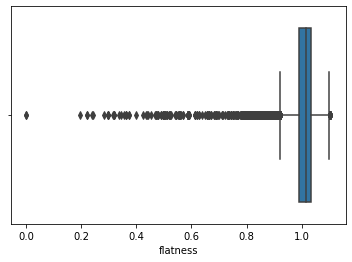

lower limit for outliers: 0.92215472459793
upper limit for outliers: 1.1006868481636056
total number of outliers in flatness is 4730

******************** instrumentalness ********************


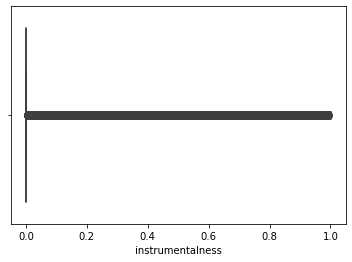

lower limit for outliers: -0.0001470273652599552
upper limit for outliers: 0.0002450554801023408
total number of outliers in instrumentalness is 36170

******************** liveness ********************


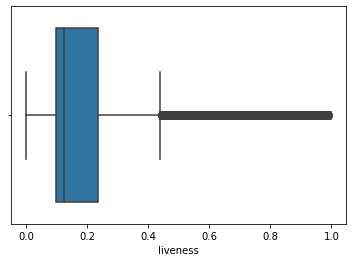

lower limit for outliers: -0.10397185012698186
upper limit for outliers: 0.43979986384511005
total number of outliers in liveness is 10369

******************** loudness ********************


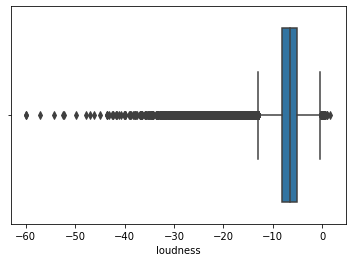

lower limit for outliers: -12.955500602722164
upper limit for outliers: -0.3594999313354519
total number of outliers in loudness is 7220

******************** mechanism ********************


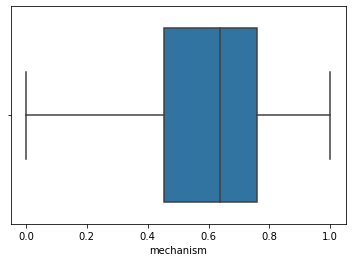

lower limit for outliers: -0.004240110516548323
upper limit for outliers: 1.215044066309929
total number of outliers in mechanism is 0

******************** organism ********************


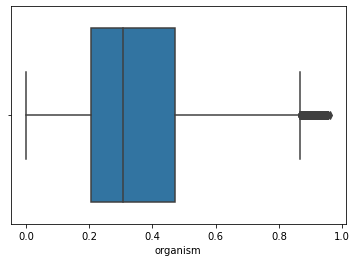

lower limit for outliers: -0.19232356548309315
upper limit for outliers: 0.8675504922866819
total number of outliers in organism is 1577

******************** speechiness ********************


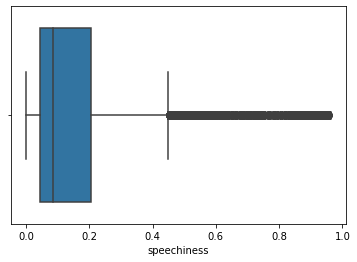

lower limit for outliers: -0.19760443037375802
upper limit for outliers: 0.4483680562116204
total number of outliers in speechiness is 4928

******************** tempo ********************


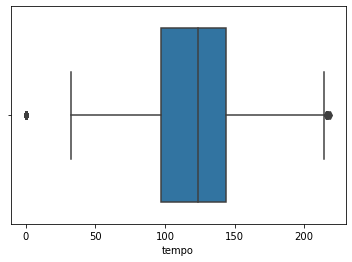

lower limit for outliers: 26.402996063232422
upper limit for outliers: 214.67499923706055
total number of outliers in tempo is 53

******************** valence ********************


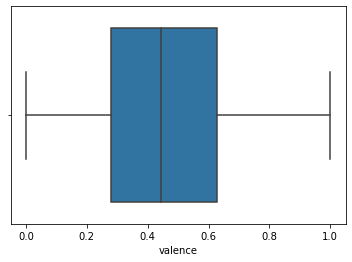

lower limit for outliers: -0.23928359150886552
upper limit for outliers: 1.1457092463970184
total number of outliers in valence is 0

******************** acoustic_vector_0 ********************


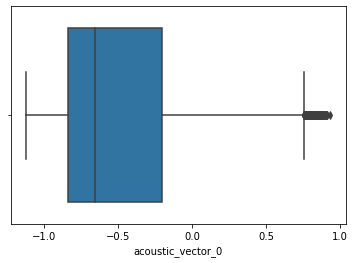

lower limit for outliers: -1.7993178032338621
upper limit for outliers: 0.7546333707869056
total number of outliers in acoustic_vector_0 is 215

******************** acoustic_vector_1 ********************


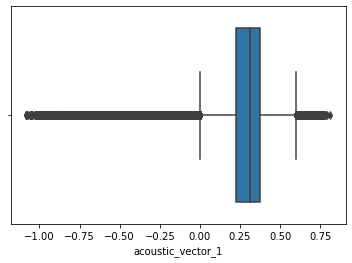

lower limit for outliers: 0.002450756728649167
upper limit for outliers: 0.5981901809573172
total number of outliers in acoustic_vector_1 is 16875

******************** acoustic_vector_2 ********************


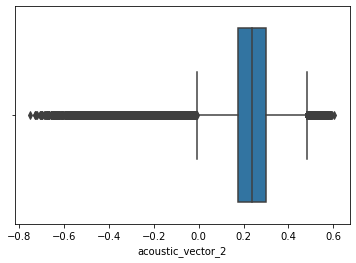

lower limit for outliers: -0.010009853169322153
upper limit for outliers: 0.48308964259922516
total number of outliers in acoustic_vector_2 is 19021

******************** acoustic_vector_3 ********************


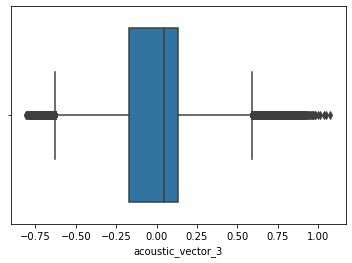

lower limit for outliers: -0.6279347911477087
upper limit for outliers: 0.5917838439345358
total number of outliers in acoustic_vector_3 is 6420

******************** acoustic_vector_4 ********************


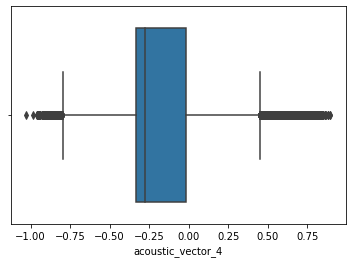

lower limit for outliers: -0.7979631889611483
upper limit for outliers: 0.4483757000416518
total number of outliers in acoustic_vector_4 is 14455

******************** acoustic_vector_5 ********************


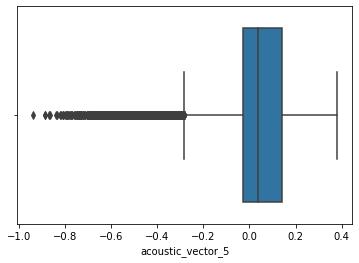

lower limit for outliers: -0.28435334190726264
upper limit for outliers: 0.3937545754015444
total number of outliers in acoustic_vector_5 is 1640

******************** acoustic_vector_6 ********************


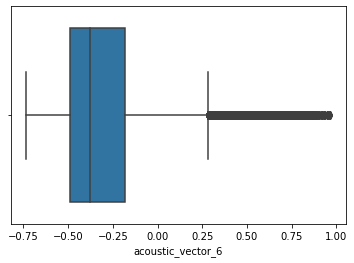

lower limit for outliers: -0.9534930754452945
upper limit for outliers: 0.28303107433021085
total number of outliers in acoustic_vector_6 is 11304

******************** acoustic_vector_7 ********************


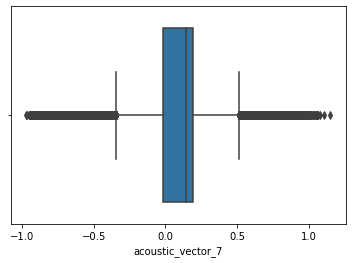

lower limit for outliers: -0.34344582795165457
upper limit for outliers: 0.5170699658337978
total number of outliers in acoustic_vector_7 is 20848



In [43]:
for i in lst2:
    print('*'*20,i,'*'*20)
    sns.boxplot(new_df[i])
    plt.show()
    q1 = np.percentile(new_df[i],25)
    q3 = np.percentile(new_df[i],75)
    iqr = q3 - q1
    lw_lm = q1 - 1.5*iqr
    up_lm = q3 + 1.5*iqr
    print('lower limit for outliers:',lw_lm)
    print('upper limit for outliers:',up_lm)
    print('total number of outliers in {} is {}'.format(i,len(new_df[i][new_df[i]>up_lm]) + len(new_df[i][new_df[i]<lw_lm])))
    print()

### Outlier capping

In [44]:

for i in lst2:
    q1 = np.percentile(new_df[i],25)
    q3 = np.percentile(new_df[i],75)
    iqr = q3 - q1
    lw_lm = q1 - 1.5*iqr
    up_lm = q3 + 1.5*iqr
    new_df[i] = np.where(new_df[i]>up_lm, up_lm, np.where(new_df[i]<lw_lm, lw_lm, new_df[i]))

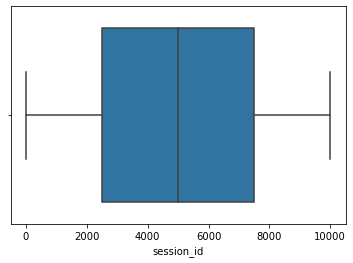

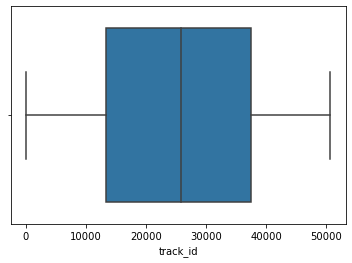

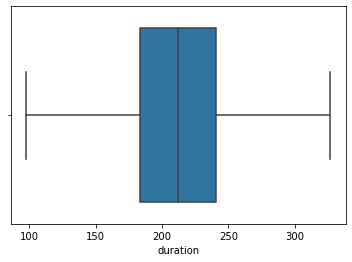

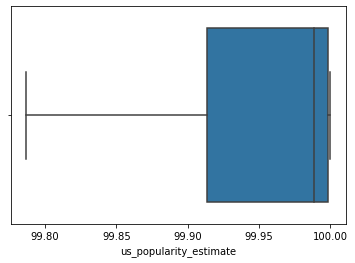

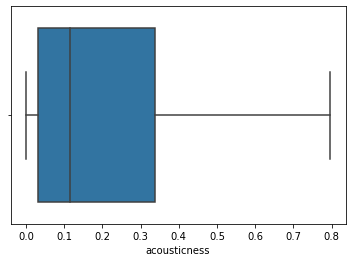

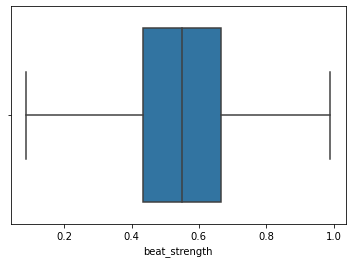

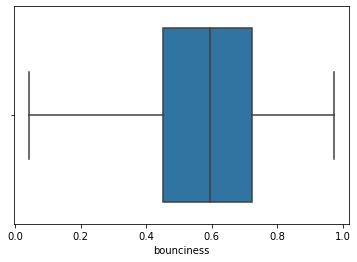

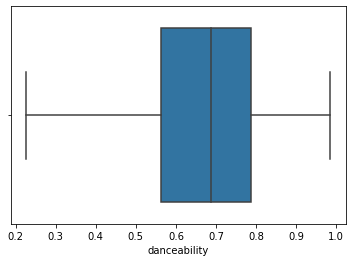

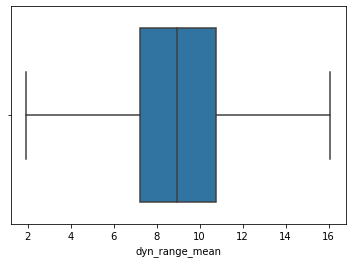

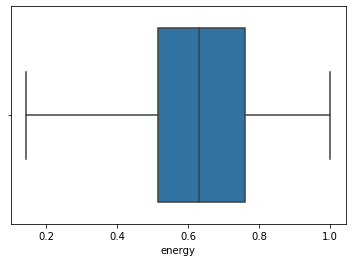

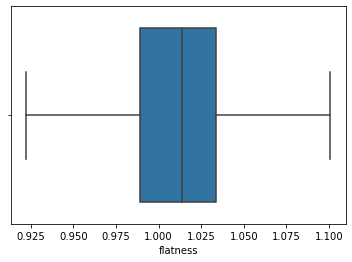

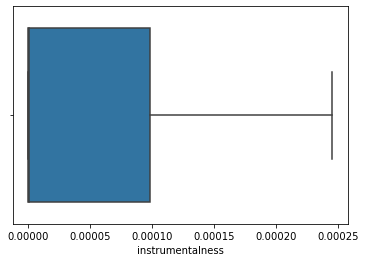

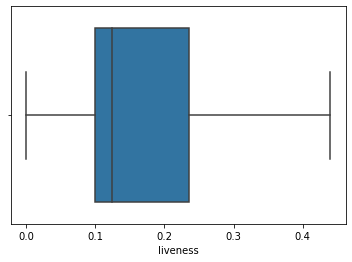

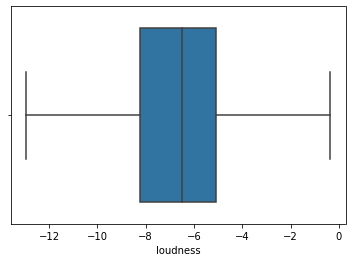

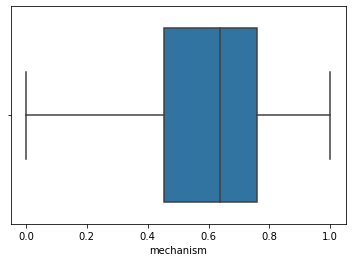

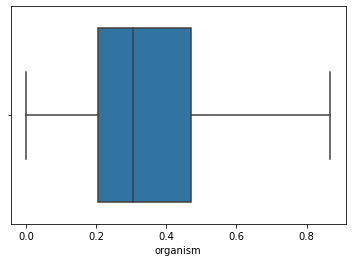

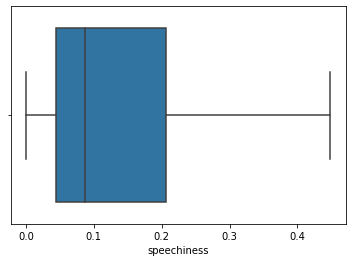

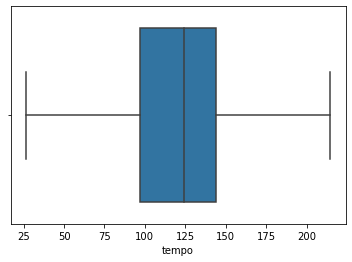

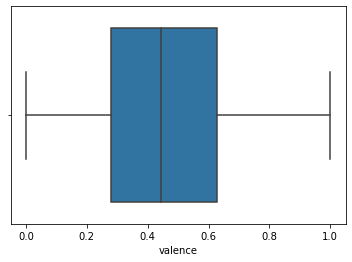

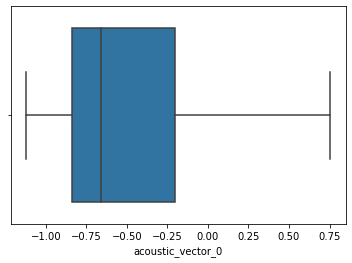

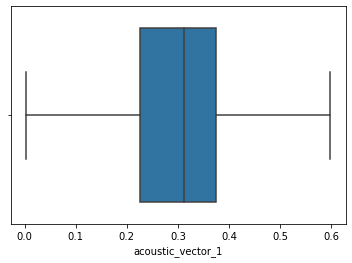

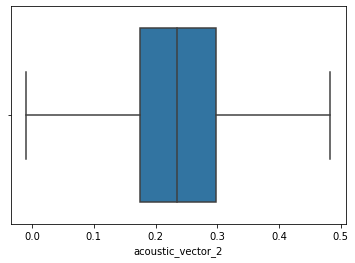

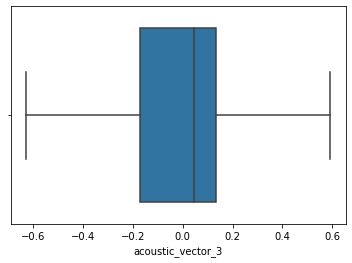

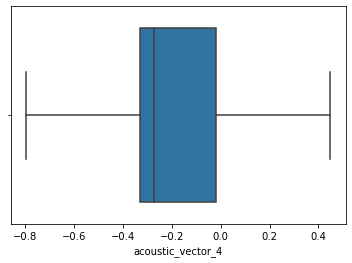

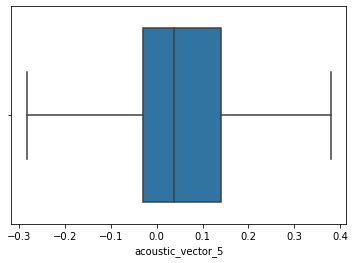

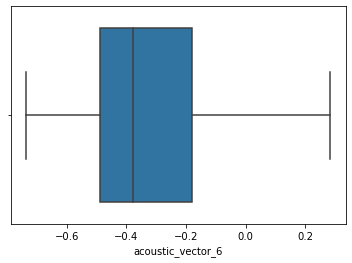

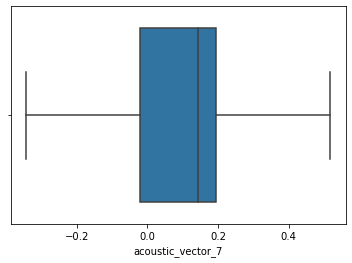

In [45]:
for i in lst2:
    sns.boxplot(new_df[i])
    plt.show()

In [46]:
df_to_scale = new_df[lst2].drop(['session_id','track_id'], axis=1)

In [47]:
df_to_scale

,duration,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,...,tempo,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,180.066666,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,2.450555e-04,...,134.024994,0.152255,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826
1,180.066666,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,2.450555e-04,...,134.024994,0.152255,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826
2,180.066666,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,2.450555e-04,...,134.024994,0.152255,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826
3,180.066666,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,2.450555e-04,...,134.024994,0.152255,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826
4,180.066666,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,2.450555e-04,...,134.024994,0.152255,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167875,181.263672,99.786506,0.198840,0.700805,0.773838,0.765879,11.919822,0.772188,1.035604,9.283284e-09,...,159.912994,0.599401,-0.842907,0.325243,0.207480,0.064804,-0.258140,-0.001348,-0.548543,0.176667
167876,171.258774,99.849173,0.392802,0.601739,0.730292,0.736095,11.895762,0.820989,0.968619,2.642195e-05,...,150.136993,0.322569,-0.922512,0.331971,0.218592,0.093307,-0.309999,-0.004573,-0.549420,0.219733
167877,208.623718,99.788573,0.010805,0.709752,0.739182,0.841011,10.641563,0.447803,1.046258,1.882513e-08,...,99.990997,0.443760,-0.771976,0.383800,0.367541,0.026499,-0.370684,0.083014,-0.334056,0.097527
167878,166.465576,99.786506,0.017045,0.698399,0.696018,0.807472,9.638963,0.731210,1.002360,1.419743e-07,...,103.028999,0.416596,-0.978526,0.346568,0.250859,0.163195,-0.274763,-0.047336,-0.546883,0.142521


### Applying minmax scaling on numerical variables with large unique values

In [48]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
scaler = MinMaxScaler()

In [50]:
scaled_df = pd.DataFrame(data=scaler.fit_transform(df_to_scale), columns=[df_to_scale.columns])

In [51]:
scaled_df

,duration,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,...,tempo,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,0.360005,0.850750,0.019901,0.389694,0.463038,0.562792,0.405751,0.479000,0.632110,1.000000e+00,...,0.571630,0.152256,0.163531,0.644508,0.487063,0.537798,0.372764,0.451084,0.375511,0.638306
1,0.360005,0.850750,0.019901,0.389694,0.463038,0.562792,0.405751,0.479000,0.632110,1.000000e+00,...,0.571630,0.152256,0.163531,0.644508,0.487063,0.537798,0.372764,0.451084,0.375511,0.638306
2,0.360005,0.850750,0.019901,0.389694,0.463038,0.562792,0.405751,0.479000,0.632110,1.000000e+00,...,0.571630,0.152256,0.163531,0.644508,0.487063,0.537798,0.372764,0.451084,0.375511,0.638306
3,0.360005,0.850750,0.019901,0.389694,0.463038,0.562792,0.405751,0.479000,0.632110,1.000000e+00,...,0.571630,0.152256,0.163531,0.644508,0.487063,0.537798,0.372764,0.451084,0.375511,0.638306
4,0.360005,0.850750,0.019901,0.389694,0.463038,0.562792,0.405751,0.479000,0.632110,1.000000e+00,...,0.571630,0.152256,0.163531,0.644508,0.487063,0.537798,0.372764,0.451084,0.375511,0.638306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167875,0.365227,0.000000,0.249679,0.679719,0.786186,0.711359,0.706565,0.734268,0.635458,3.788238e-05,...,0.709134,0.599407,0.149079,0.541834,0.441067,0.567949,0.433127,0.425807,0.184273,0.604419
167876,0.321573,0.293535,0.493235,0.570163,0.739339,0.672118,0.704866,0.791224,0.260254,1.078203e-01,...,0.657209,0.322573,0.106678,0.553129,0.463601,0.591318,0.391518,0.420955,0.183412,0.654467
167877,0.484606,0.009681,0.013567,0.689613,0.748903,0.810350,0.616298,0.355684,0.695134,7.681988e-05,...,0.390860,0.443764,0.186860,0.640128,0.765669,0.536545,0.342828,0.552737,0.394673,0.512452
167878,0.300660,0.000000,0.021403,0.677057,0.702467,0.766160,0.545498,0.686443,0.449251,5.793557e-04,...,0.406996,0.416600,0.076843,0.577631,0.529039,0.648617,0.419789,0.356613,0.185901,0.564739


### Final Dataframe after preprocessing

In [52]:
final_df = pd.concat([new_df[lst2][['session_id','track_id']], cat_var_copy['date'], new_df[lst1], scaled_df],axis=1)

In [62]:
final_df.head()

,session_id,track_id,date,hist_user_behavior_is_shuffle,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,mode,skipped,...,tempo,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,0.0,890.0,2018-07-15,1,1,2,7,6,0,0,...,0.57163,0.152256,0.163531,0.644508,0.487063,0.537798,0.372764,0.451084,0.375511,0.638306
1,24.0,890.0,2018-07-15,0,1,2,4,2,0,0,...,0.57163,0.152256,0.163531,0.644508,0.487063,0.537798,0.372764,0.451084,0.375511,0.638306
2,836.0,890.0,2018-07-14,0,1,5,7,6,0,0,...,0.57163,0.152256,0.163531,0.644508,0.487063,0.537798,0.372764,0.451084,0.375511,0.638306
3,896.0,890.0,2018-07-15,0,1,2,4,6,0,0,...,0.57163,0.152256,0.163531,0.644508,0.487063,0.537798,0.372764,0.451084,0.375511,0.638306
4,1142.0,890.0,2018-07-14,1,0,2,7,3,0,0,...,0.57163,0.152256,0.163531,0.644508,0.487063,0.537798,0.372764,0.451084,0.375511,0.638306


In [54]:
final_df.columns = [str(col).replace('(', '').replace(')', '').replace(',', '').replace("'","") 
                                                                                 for col in final_df.columns]

In [56]:
final_df

,session_id,track_id,date,hist_user_behavior_is_shuffle,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,mode,skipped,...,tempo,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,0.0,890.0,2018-07-15,1,1,2,7,6,0,0,...,0.571630,0.152256,0.163531,0.644508,0.487063,0.537798,0.372764,0.451084,0.375511,0.638306
1,24.0,890.0,2018-07-15,0,1,2,4,2,0,0,...,0.571630,0.152256,0.163531,0.644508,0.487063,0.537798,0.372764,0.451084,0.375511,0.638306
2,836.0,890.0,2018-07-14,0,1,5,7,6,0,0,...,0.571630,0.152256,0.163531,0.644508,0.487063,0.537798,0.372764,0.451084,0.375511,0.638306
3,896.0,890.0,2018-07-15,0,1,2,4,6,0,0,...,0.571630,0.152256,0.163531,0.644508,0.487063,0.537798,0.372764,0.451084,0.375511,0.638306
4,1142.0,890.0,2018-07-14,1,0,2,7,3,0,0,...,0.571630,0.152256,0.163531,0.644508,0.487063,0.537798,0.372764,0.451084,0.375511,0.638306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167875,9997.0,39527.0,2018-07-14,1,1,5,4,3,1,1,...,0.709134,0.599407,0.149079,0.541834,0.441067,0.567949,0.433127,0.425807,0.184273,0.604419
167876,9997.0,13614.0,2018-07-14,1,1,5,4,3,1,1,...,0.657209,0.322573,0.106678,0.553129,0.463601,0.591318,0.391518,0.420955,0.183412,0.654467
167877,9997.0,12564.0,2018-07-14,1,1,5,7,6,0,0,...,0.390860,0.443764,0.186860,0.640128,0.765669,0.536545,0.342828,0.552737,0.394673,0.512452
167878,9997.0,34353.0,2018-07-14,1,1,5,7,3,1,0,...,0.406996,0.416600,0.076843,0.577631,0.529039,0.648617,0.419789,0.356613,0.185901,0.564739


## Filter columns based on correlation

In [63]:
## Filtering columns with corelation greater than 0.7

corr_matrix = final_df.corr()
high_corr_cols = corr_matrix[abs(corr_matrix) >0.7].stack().reset_index(name='correlation')
high_corr_cols

,level_0,level_1,correlation
0,session_id,session_id,1.000000
1,track_id,track_id,1.000000
2,hist_user_behavior_is_shuffle,hist_user_behavior_is_shuffle,1.000000
3,premium,premium,1.000000
4,context_type,context_type,1.000000
...,...,...,...
67,acoustic_vector_4,acoustic_vector_4,1.000000
68,acoustic_vector_5,acoustic_vector_3,-0.809317
69,acoustic_vector_5,acoustic_vector_5,1.000000
70,acoustic_vector_6,acoustic_vector_6,1.000000


In [66]:
high_corr_cols = high_corr_cols.query('level_0 != level_1')
high_corr_cols

,level_0,level_1,correlation
13,no_pause_before_play,short_pause_before_play,-0.753359
14,no_pause_before_play,long_pause_before_play,-0.830743
15,short_pause_before_play,no_pause_before_play,-0.753359
17,short_pause_before_play,long_pause_before_play,0.906850
18,long_pause_before_play,no_pause_before_play,-0.830743
19,long_pause_before_play,short_pause_before_play,0.906850
30,acousticness,organism,0.760685
32,beat_strength,bounciness,0.966041
33,beat_strength,danceability,0.883325
34,beat_strength,dyn_range_mean,0.894380


In [67]:
high_corr_cols = high_corr_cols[high_corr_cols['level_0'] < high_corr_cols['level_1']]
high_corr_cols

,level_0,level_1,correlation
13,no_pause_before_play,short_pause_before_play,-0.753359
18,long_pause_before_play,no_pause_before_play,-0.830743
19,long_pause_before_play,short_pause_before_play,0.906850
30,acousticness,organism,0.760685
32,beat_strength,bounciness,0.966041
33,beat_strength,danceability,0.883325
34,beat_strength,dyn_range_mean,0.894380
37,bounciness,danceability,0.875957
38,bounciness,dyn_range_mean,0.964000
42,danceability,dyn_range_mean,0.822608


In [68]:
high_corr_cols[3:]

,level_0,level_1,correlation
30,acousticness,organism,0.760685
32,beat_strength,bounciness,0.966041
33,beat_strength,danceability,0.883325
34,beat_strength,dyn_range_mean,0.894380
37,bounciness,danceability,0.875957
38,bounciness,dyn_range_mean,0.964000
42,danceability,dyn_range_mean,0.822608
48,energy,loudness,0.706957
55,mechanism,organism,-0.864179
66,acoustic_vector_3,acoustic_vector_5,-0.809317


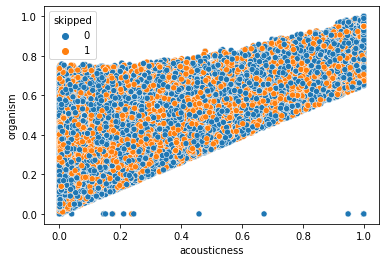

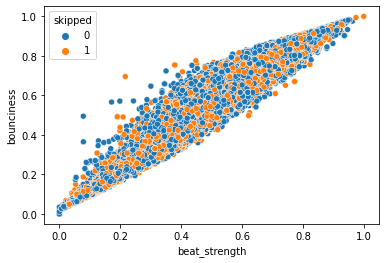

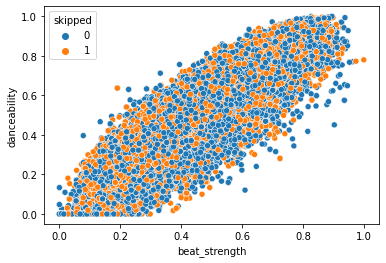

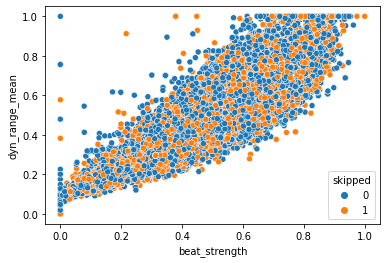

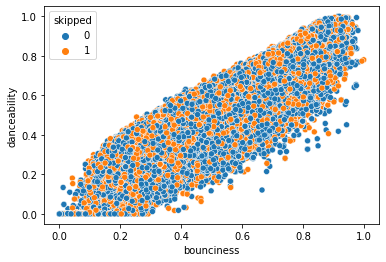

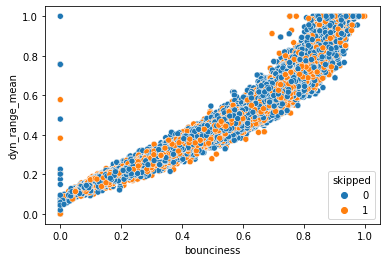

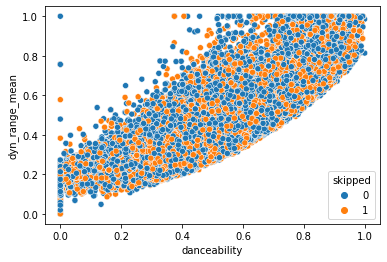

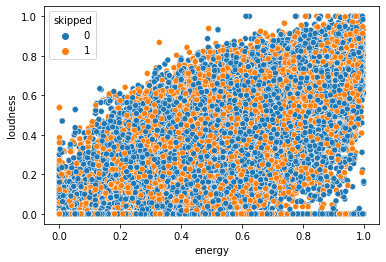

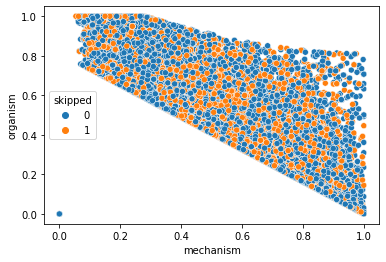

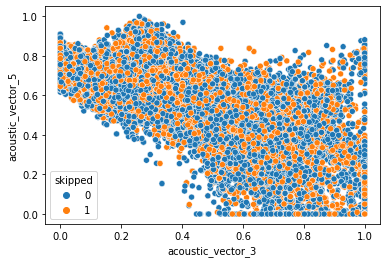

In [69]:
for i,j in zip(high_corr_cols['level_0'][3:],high_corr_cols['level_1'][3:]):
    sns.scatterplot(x=final_df[i], y=final_df[j], hue=final_df['skipped'])
    plt.xlabel(i)
    plt.ylabel(j)
    plt.show()